In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv('Kolkata.csv')
df1.head(20)

,location,size,total_sqft,bath,price
0,Barasat,2 BHK,1056,2.0,39.07
1,Keshtopur,4 Bedroom,2600,5.0,120.00
2,Rajarhat,3 BHK,1440,2.0,62.00
3,Narendrapur,3 BHK,1521,3.0,95.00
4,New Town,2 BHK,1200,2.0,51.00
5,Joka,2 BHK,1170,2.0,38.00
6,Tangra,4 BHK,2732,4.0,204.00
7,Sonarpur,4 BHK,3300,4.0,600.00
8,Sonarpur,3 BHK,1310,3.0,63.25
9,Madhyamgram,6 Bedroom,1020,6.0,370.00


In [3]:
df1.shape

(6507, 5)

In [4]:
df1.isnull().sum()

location       0
size           7
total_sqft     0
bath          41
price          0
dtype: int64

In [5]:
df3 = df1.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [6]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK'],
      dtype=object)

In [7]:
def get_bhk(x):
    try:
        return int(x.split(' ')[0])
    except:
        return None

# Apply the function to create a new column with the BHK value
df3['bhk'] = df3['size'].apply(get_bhk)

C:\Users\Anubhab\AppData\Local\Temp\ipykernel_11120\1109610341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(get_bhk)


In [8]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Barasat,2 BHK,1056,2.0,39.07,2
1,Keshtopur,4 Bedroom,2600,5.0,120.00,4
2,Rajarhat,3 BHK,1440,2.0,62.00,3
3,Narendrapur,3 BHK,1521,3.0,95.00,3
4,New Town,2 BHK,1200,2.0,51.00,2


In [9]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14],
      dtype=int64)

In [10]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,Behala,27 BHK,8000,27.0,230.0,27
4684,New Alipore,43 Bedroom,2400,40.0,660.0,43


In [11]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '2968', '644', '1859'], dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Dum Dum,4 BHK,2100 - 2850,4.0,186.000,4
122,Keshtopur,4 BHK,3067 - 8156,4.0,477.000,4
137,Rajarhat,2 BHK,1042 - 1105,2.0,54.005,2
165,Rajarhat,2 BHK,1145 - 1340,2.0,43.490,2
188,Madhyamgram,2 BHK,1015 - 1540,2.0,56.800,2
410,New Town,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Sodepur,2 BHK,1195 - 1440,2.0,63.770,2
648,Rajarhat,9 Bedroom,4125Perch,9.0,265.000,9
661,Alipore,2 BHK,1120 - 1145,2.0,48.130,2
672,Ballygunge,4 Bedroom,3090 - 5002,4.0,445.000,4


In [14]:
def convert_sqft_to_num(x):
    if isinstance(x, int) or isinstance(x, float):
        x = str(x)
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [15]:
convert_sqft_to_num('2166')

2166.0

In [16]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [17]:
convert_sqft_to_num('34.465Sq. Meter')

In [18]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Barasat,2 BHK,1056.0,2.0,39.07,2
1,Keshtopur,4 Bedroom,2600.0,5.0,120.00,4
2,Rajarhat,3 BHK,1440.0,2.0,62.00,3
3,Narendrapur,3 BHK,1521.0,3.0,95.00,3
4,New Town,2 BHK,1200.0,2.0,51.00,2


In [19]:
print(df4.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6497, 6498, 6499, 6500, 6501, 6502, 6503, 6504, 6505, 6506],
           dtype='int64', length=6466)


In [20]:
df4.loc[29]

location      Madhyamgram
size                3 BHK
total_sqft         1025.0
bath                  2.0
price                47.0
bhk                     3
Name: 29, dtype: object

In [21]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Barasat,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Keshtopur,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Rajarhat,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Narendrapur,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,New Town,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
len(df5.location.unique())

308

In [23]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
New Town                              706
Rajarhat                              404
Tangra                                368
Dum Dum                               312
Garia                                 302
                                     ... 
Rabindra Sarovar                        1
Bedia Danga Kasba                       1
Kestopur                                1
Keyatala                                1
Acharya Jagadish Chandra Bose Road      1
Name: location, Length: 308, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

230

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Rishra                                10
Action Area III                       10
Dhakuria Station Road                 10
Baghajatin                            10
East Kolkata Township                 10
                                      ..
Rabindra Sarovar                       1
Bedia Danga Kasba                      1
Kestopur                               1
Keyatala                               1
Acharya Jagadish Chandra Bose Road     1
Name: location, Length: 230, dtype: int64

In [26]:
len(df5.location.unique())

308

In [27]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

79

In [28]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Barasat,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Keshtopur,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Rajarhat,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Narendrapur,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,New Town,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Joka,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Tangra,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Sonarpur,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Sonarpur,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Madhyamgram,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [29]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Madhyamgram,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Sodepur,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Dum Dum,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Gariahat,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Lake Gardens,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [30]:
df5.shape

(6466, 7)

In [31]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(6089, 7)

In [32]:
df6.price_per_sqft.describe()

count     6064.000000
mean      6230.556240
std       3633.457170
min        267.829813
25%       4210.526316
50%       5300.000000
75%       6900.537017
max      76530.612245
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(5202, 7)

In [34]:
df7.to_csv('Capitals.csv',index=False)

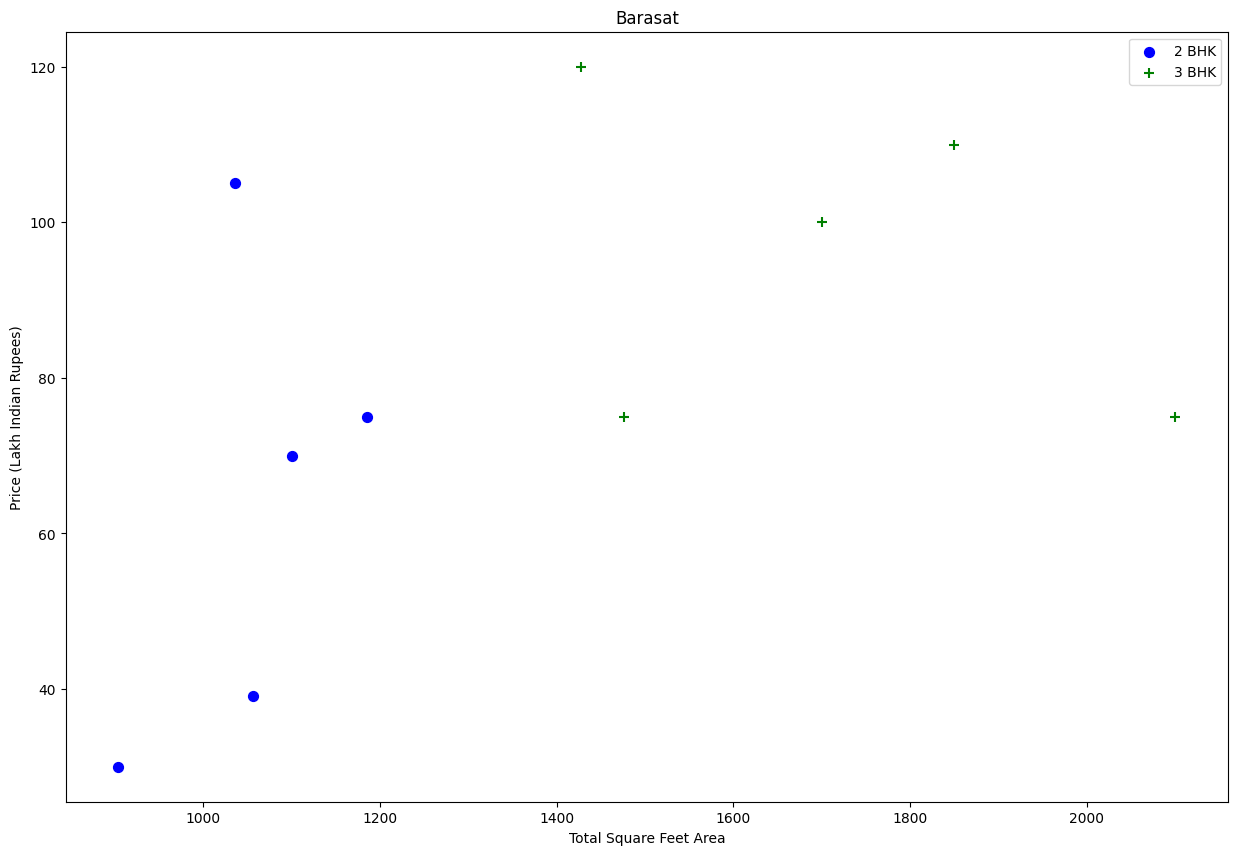

In [35]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Barasat")

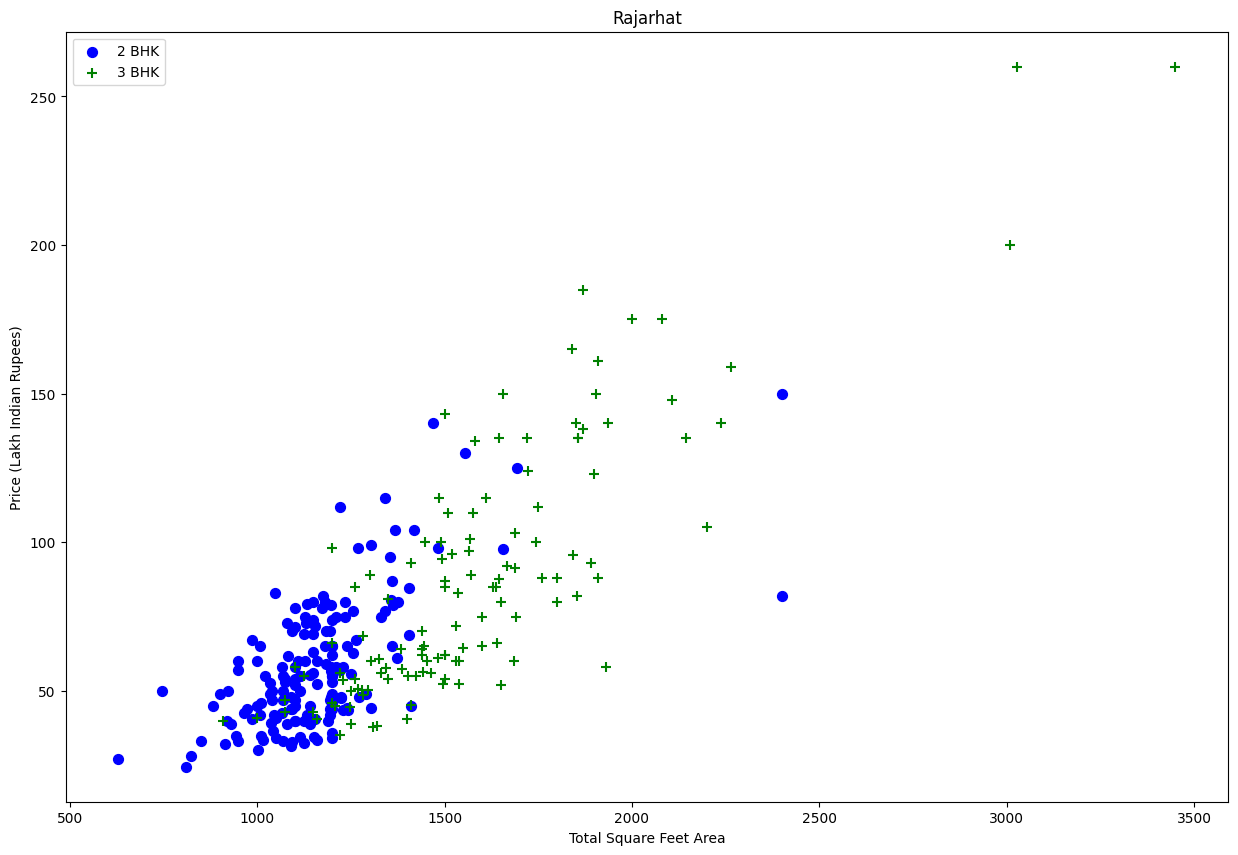

In [36]:
plot_scatter_chart(df7,"Rajarhat")

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(3252, 7)

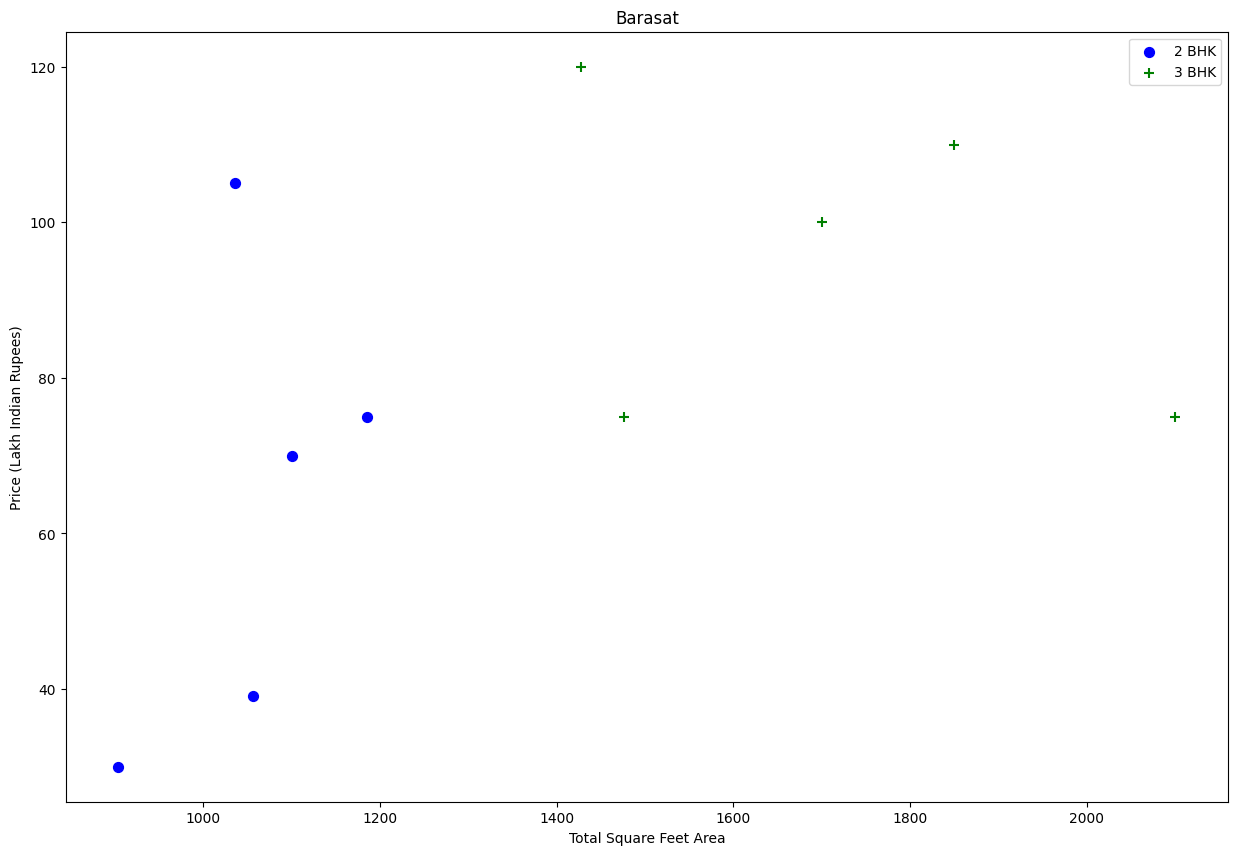

In [38]:
plot_scatter_chart(df8,"Barasat")

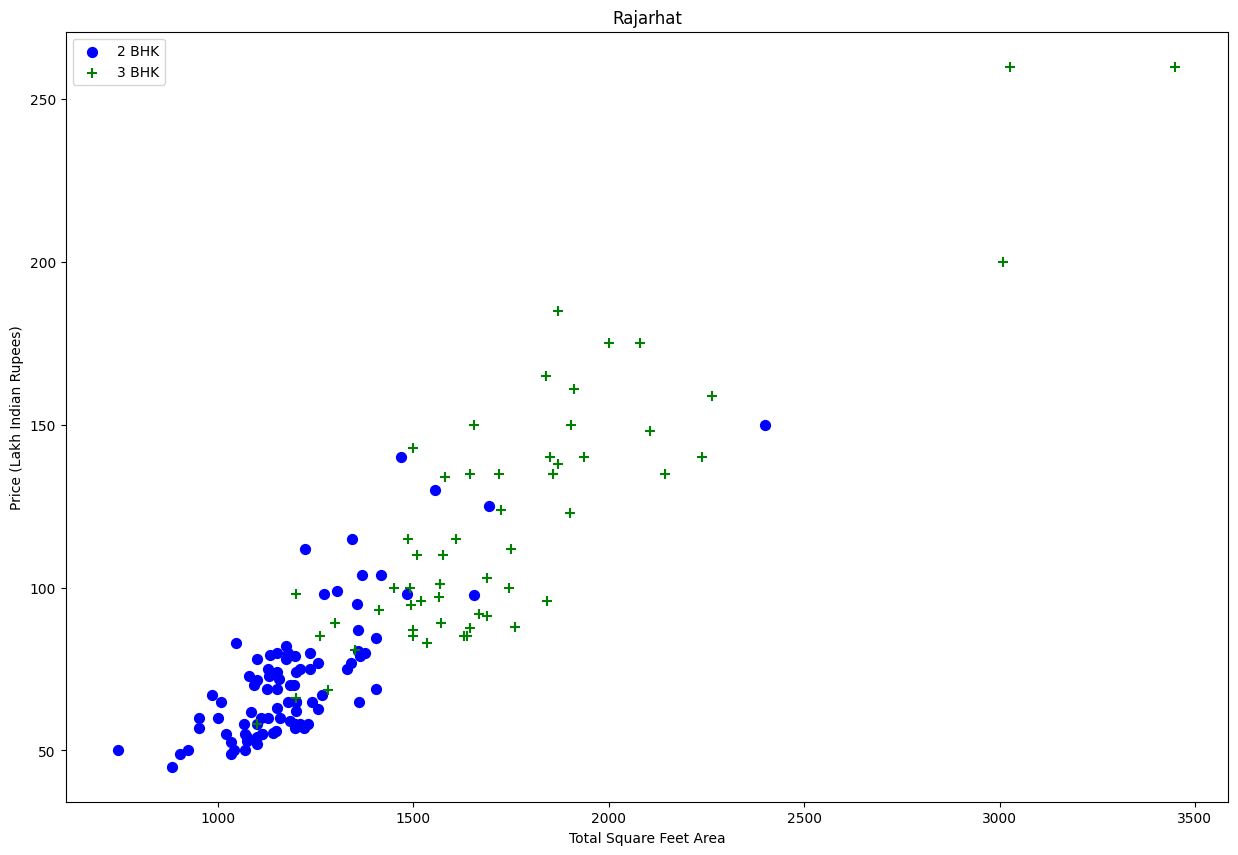

In [39]:
plot_scatter_chart(df8,"Rajarhat")

Text(0, 0.5, 'Count')

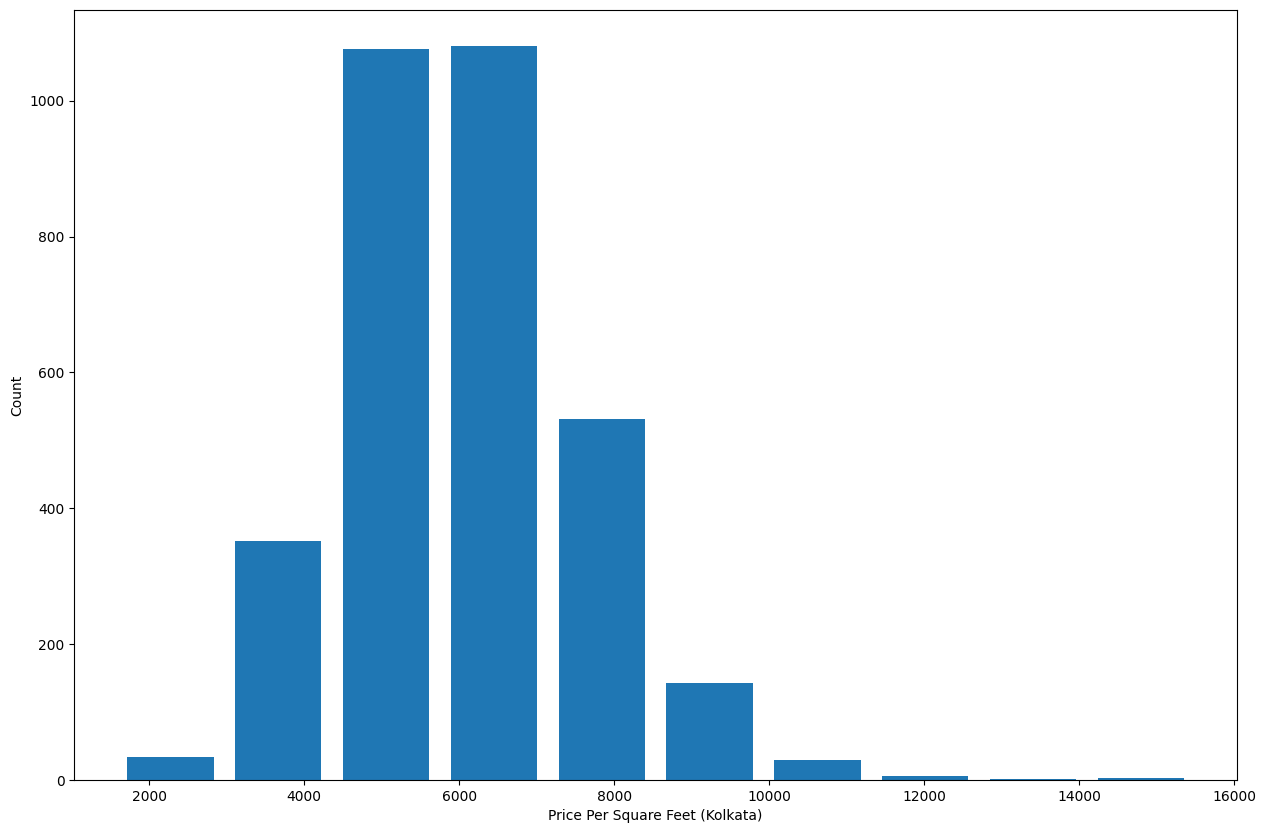

In [40]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet (Kolkata)")
plt.ylabel("Count")

In [41]:
df8.bath.unique()

array([ 3.,  1.,  5.,  4.,  2.,  6.,  7.,  9., 12.,  8., 16., 10.])

In [42]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
459,Behala,10 BHK,12000.0,12.0,525.0,10,4375.0
1131,Garia,16 BHK,10000.0,16.0,550.0,16,5500.0


Text(0, 0.5, 'Count')

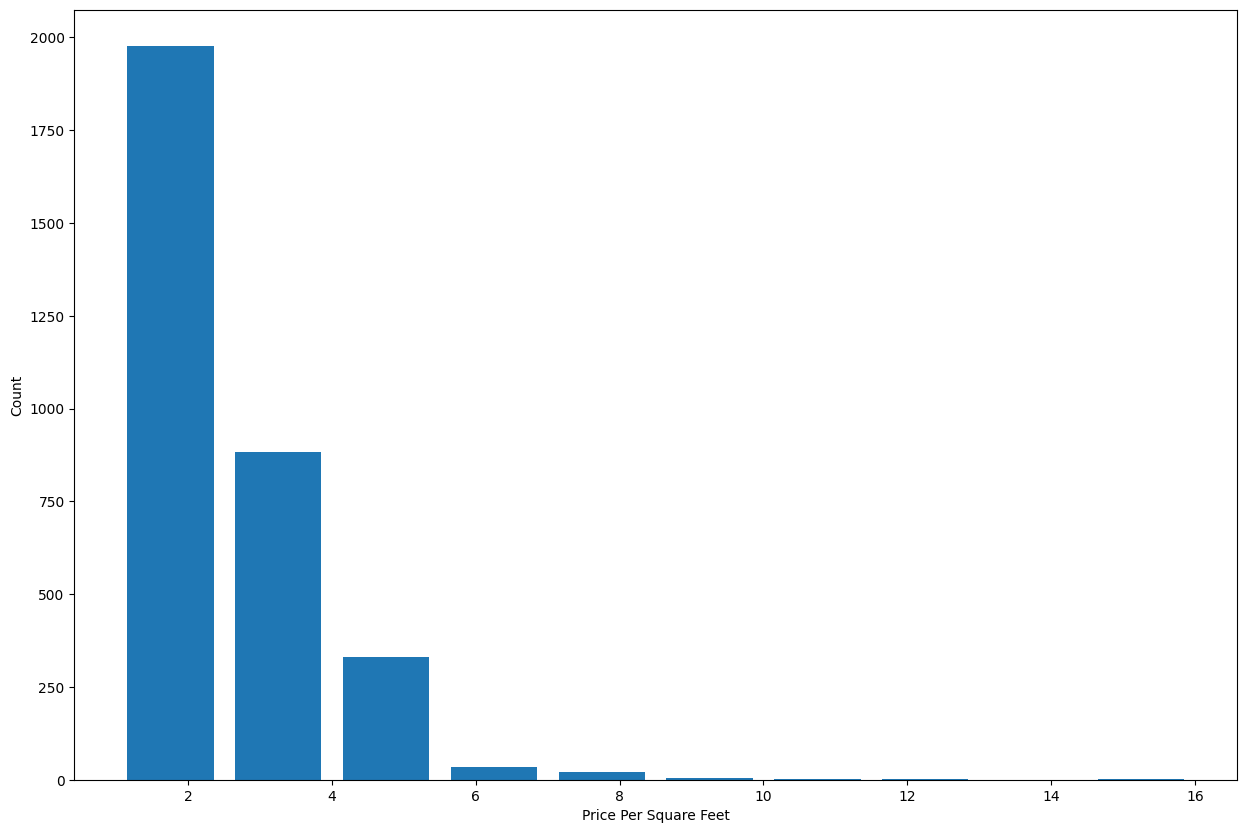

In [43]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [44]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1962,Lake Gardens,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [45]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(3211, 7)

In [46]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
1,Alipore,1804.0,3.0,120.0,3
2,Alipore,525.0,1.0,26.0,1
4,Alipore,3000.0,5.0,275.0,4
7,Alipore,1825.0,3.0,100.0,3
11,Alipore,1697.0,3.0,108.0,3


In [47]:
dummies = pd.get_dummies(df10.location)
dummies.head(5)

,Alipore,Baguiati,Ballygunge,Bansdroni,Baranagar,Barasat,Barisha Purba Para Road,Barrackpore,Behala,Belghoria,...,Tangra,Tiljala,Tollygunge,Topsia,Ultadanga,Uttarpara Kotrung,birati,kalikapur,other,south dum dum
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(5)

,location,total_sqft,bath,price,bhk,Alipore,Baguiati,Ballygunge,Bansdroni,Baranagar,...,Tagore Park,Tangra,Tiljala,Tollygunge,Topsia,Ultadanga,Uttarpara Kotrung,birati,kalikapur,south dum dum
1,Alipore,1804.0,3.0,120.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alipore,525.0,1.0,26.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alipore,3000.0,5.0,275.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Alipore,1825.0,3.0,100.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Alipore,1697.0,3.0,108.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df12 = df11.drop('location',axis='columns')
df12.head(5)

,total_sqft,bath,price,bhk,Alipore,Baguiati,Ballygunge,Bansdroni,Baranagar,Barasat,...,Tagore Park,Tangra,Tiljala,Tollygunge,Topsia,Ultadanga,Uttarpara Kotrung,birati,kalikapur,south dum dum
1,1804.0,3.0,120.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,525.0,1.0,26.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,5.0,275.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1825.0,3.0,100.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1697.0,3.0,108.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x = df12.drop(['price'],axis='columns')
x.head(5)

,total_sqft,bath,bhk,Alipore,Baguiati,Ballygunge,Bansdroni,Baranagar,Barasat,Barisha Purba Para Road,...,Tagore Park,Tangra,Tiljala,Tollygunge,Topsia,Ultadanga,Uttarpara Kotrung,birati,kalikapur,south dum dum
1,1804.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,525.0,1.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,5.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1825.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1697.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y = df12.price
y.head()

1     120.0
2      26.0
4     275.0
7     100.0
11    108.0
Name: price, dtype: float64

TRAINING AND TESTING MODEL

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [53]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8897469951780668

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.7872087 , 0.83483996, 0.84847533, 0.93640738, 0.81982822])

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
import pandas as pd

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],  # Corrected criterion values
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Replace x and y with your data
find_best_model_using_gridsearchcv(x, y)


C:\Users\Anubhab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Anubhab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Anubhab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Anubhab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_clas

,model,best_score,best_params
0,linear_regression,0.845939,{'fit_intercept': False}
1,lasso,0.841011,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.726228,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [56]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]

    arr = np.zeros(len(x.columns))
    arr[0] = sqft
    arr[1] = bath
    arr[2] = bhk
    if loc_index >= 0:
        arr[loc_index] = 1

    return lr_clf.predict([arr])[0]

In [57]:
predict_price('Rajarhat',1000, 2, 2)

C:\Users\Anubhab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.89277415860007

In [58]:
predict_price('Alipore',1000, 3, 3)

C:\Users\Anubhab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.05439929708709

In [59]:
predict_price('Barasat',1000, 2, 2)

C:\Users\Anubhab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.217416063812685

In [60]:
predict_price('New Town',1000, 3, 3)

C:\Users\Anubhab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.05076972700347

In [61]:
import pickle
with open('kolkata_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [62]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))